In [3]:
install.packages("tidyverse")
library(tidyverse)
install.packages("dplyr")
library(dplyr)
install.packages("gridExtra")
library(gridExtra)
install.packages("GGally")
library(GGally)
install.packages("esquisse")
library(esquisse)

Installing tidyverse [2.0.0] ...
	OK [linked cache]


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Installing dplyr [1.1.2] ...
	OK [linked cache]
Installing gridExtra [2.3] ...
	OK [linked cache]



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Installing GGally [2.1.2] ...
	OK [linked cache]


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/esquisse_1.1.2.tar.gz' ...
	OK [downloaded 1.4 Mb in 0.8 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/datamods_1.4.0.tar.gz' ...
	OK [downloaded 729.5 Kb in 0.4 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/phosphoricons_0.2.0.tar.gz' ...
	OK [downloaded 2.6 Mb in 0.4 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/rio_0.5.29.tar.gz' ...
	OK [downloaded 526.3 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/openxlsx_4.2.5.2.tar.gz' ...
	OK [downloaded 1.9 Mb in 0.2 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/shinyWidgets_0.7.6.tar.gz' ...
	OK [downloaded 1.2 Mb in 0.2 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/anytime_0

In [4]:
library(help = "datasets")

Documentation for package ‘datasets’


		Information on package ‘datasets’

Description:

Package:       datasets
Version:       4.2.1
Priority:      base
Title:         The R Datasets Package
Author:        R Core Team and contributors worldwide
Maintainer:    R Core Team <do-use-Contact-address@r-project.org>
Contact:       R-help mailing list <r-help@r-project.org>
Description:   Base R datasets.
License:       Part of R 4.2.1
Built:         R 4.2.1; ; 2022-08-11 00:41:53 UTC; unix

Index:

AirPassengers           Monthly Airline Passenger Numbers 1949-1960
BJsales                 Sales Data with Leading Indicator
BOD                     Biochemical Oxygen Demand
CO2                     Carbon Dioxide Uptake in Grass Plants
ChickWeight             Weight versus age of chicks on different diets
DNase                   Elisa assay of DNase
EuStockMarkets          Daily Closing Prices of Major European Stock
                        Indices, 1991-1998
Formaldehyde            Determinati

In [5]:
library(skimr)
data(longley)
str(longley)
skim(longley)

'data.frame':	16 obs. of  7 variables:
 $ GNP.deflator: num  83 88.5 88.2 89.5 96.2 ...
 $ GNP         : num  234 259 258 285 329 ...
 $ Unemployed  : num  236 232 368 335 210 ...
 $ Armed.Forces: num  159 146 162 165 310 ...
 $ Population  : num  108 109 110 111 112 ...
 $ Year        : int  1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 ...
 $ Employed    : num  60.3 61.1 60.2 61.2 63.2 ...
── Data Summary ────────────────────────
                           Values 
Name                       longley
Number of rows             16     
Number of columns          7      
_______________________           
Column type frequency:            
  numeric                  7      
________________________          
Group variables            None   

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   mean    sd     p0    p25    p50    p75
1 GNP.deflator          0             1  102.  10.8    83     94.5  101.   111. 
2

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 12 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,numeric,GNP.deflator,0,1,101.6813,10.791553,83.000,94.5250,100.6000,111.2500,116.900,▆▂▆▃▇
2,numeric,GNP,0,1,387.6984,99.394938,234.289,317.8810,381.4270,454.0855,554.894,▇▃▇▆▆
3,numeric,Unemployed,0,1,319.3313,93.446425,187.000,234.8250,314.3500,384.2500,480.600,▇▅▃▆▃
4,numeric,Armed.Forces,0,1,260.6687,69.591960,145.600,229.8000,271.7500,306.0750,359.400,▆▁▆▇▅
5,numeric,Population,0,1,117.4240,6.956102,107.608,111.7885,116.8035,122.3040,130.081,▇▅▅▅▃
6,numeric,Year,0,1,1954.5000,4.760952,1947.000,1950.7500,1954.5000,1958.2500,1962.000,▇▆▆▆▆
7,numeric,Employed,0,1,65.3170,3.511968,60.171,62.7125,65.5040,68.2905,70.551,▇▆▃▆▇


In [6]:
longley = longley %>% mutate(employement_rate = Employed/(Unemployed+Employed))
longley = longley %>% select(-Unemployed,-Employed)
str(longley)

'data.frame':	16 obs. of  6 variables:
 $ GNP.deflator    : num  83 88.5 88.2 89.5 96.2 ...
 $ GNP             : num  234 259 258 285 329 ...
 $ Armed.Forces    : num  159 146 162 165 310 ...
 $ Population      : num  108 109 110 111 112 ...
 $ Year            : int  1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 ...
 $ employement_rate: num  0.204 0.208 0.14 0.154 0.231 ...


function(x) diff(range(x)) / nclass.Sturges(x)

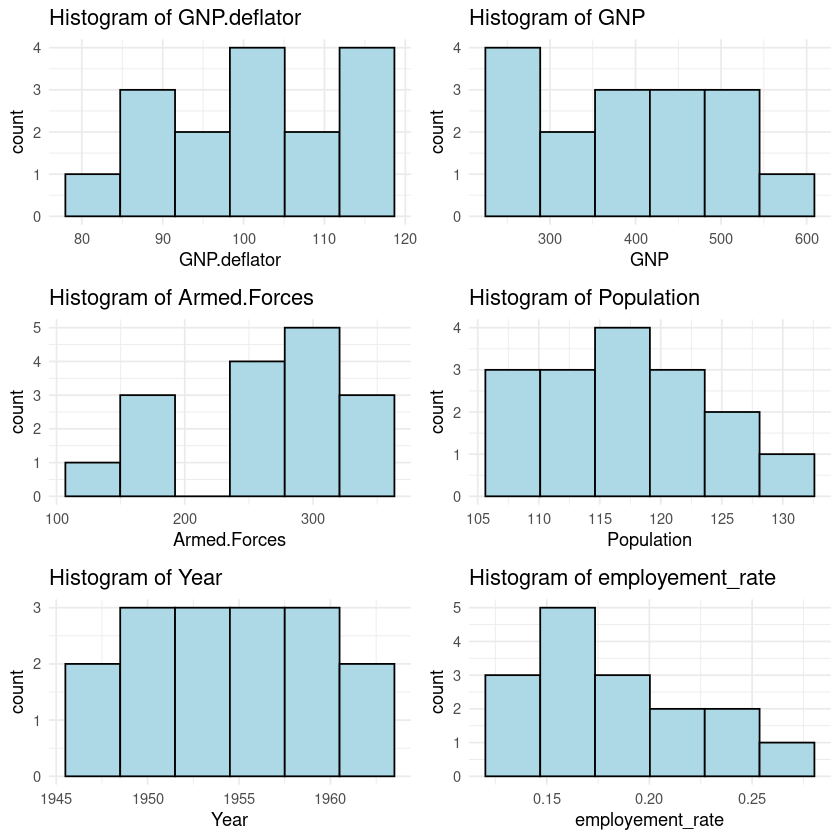

In [7]:
library(ggplot2)
library(gridExtra)

# Create a list to store individual histograms
histograms <- list()

function(x) diff(range(x)) / nclass.Sturges(x)

# Define binwidth
binwidth <- 0.5

# Iterate over each variable and create a histogram
for (variable in colnames(longley)) {
  p <- ggplot(longley, aes(x = .data[[variable]])) +
    geom_histogram(fill = "lightblue", color = "black", binwidth = function(x) diff(range(x)) / nclass.Sturges(x)) +
    labs(title = paste("Histogram of", variable)) +
    theme_minimal()
  
  histograms[[variable]] <- p
}

# Combine the histograms into a grid
grid.arrange(grobs = histograms, ncol = 2)

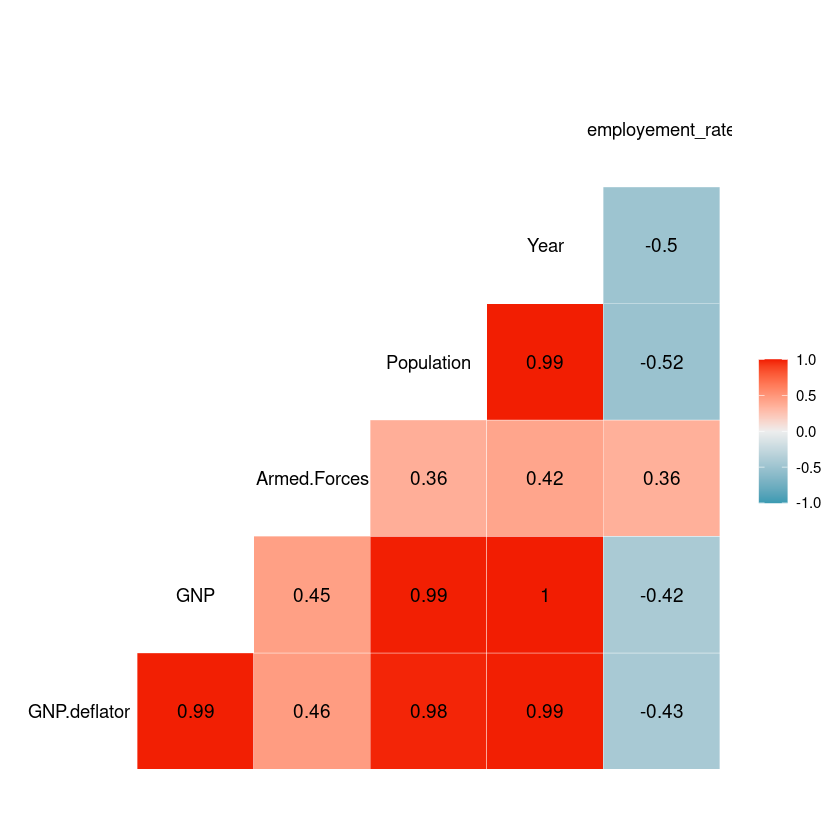

In [8]:
ggcorr(longley, label = TRUE, label_color = "black", label_round = 2)

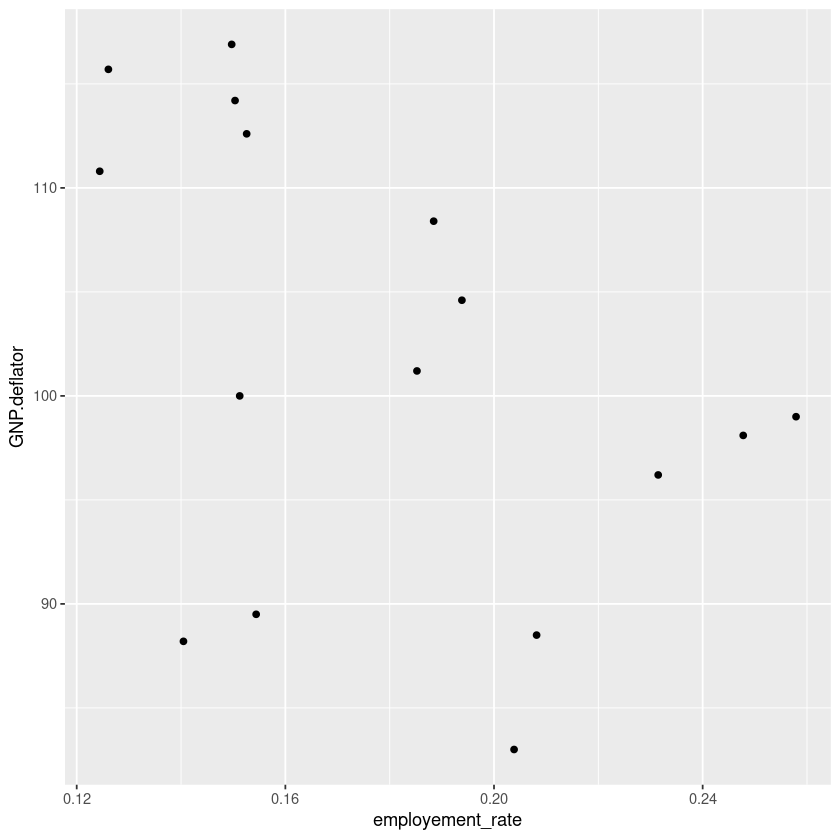

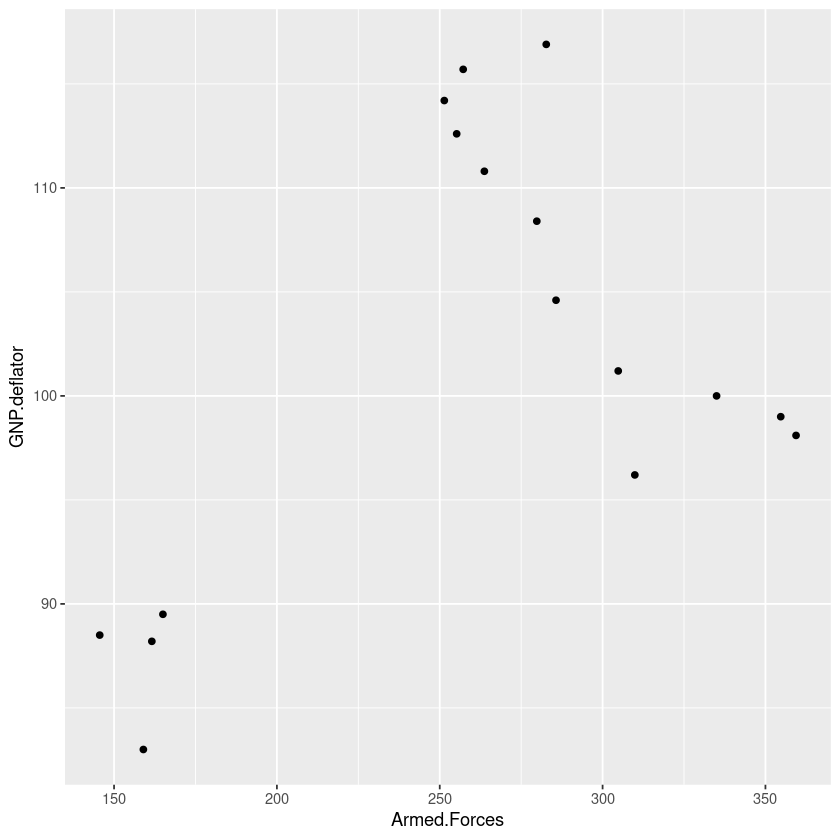

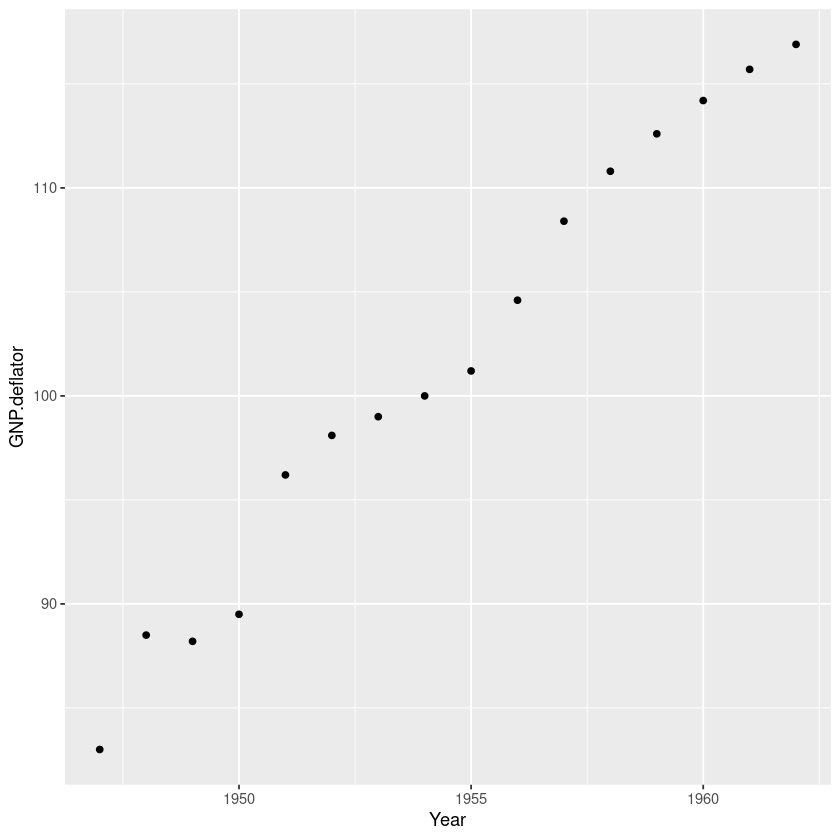

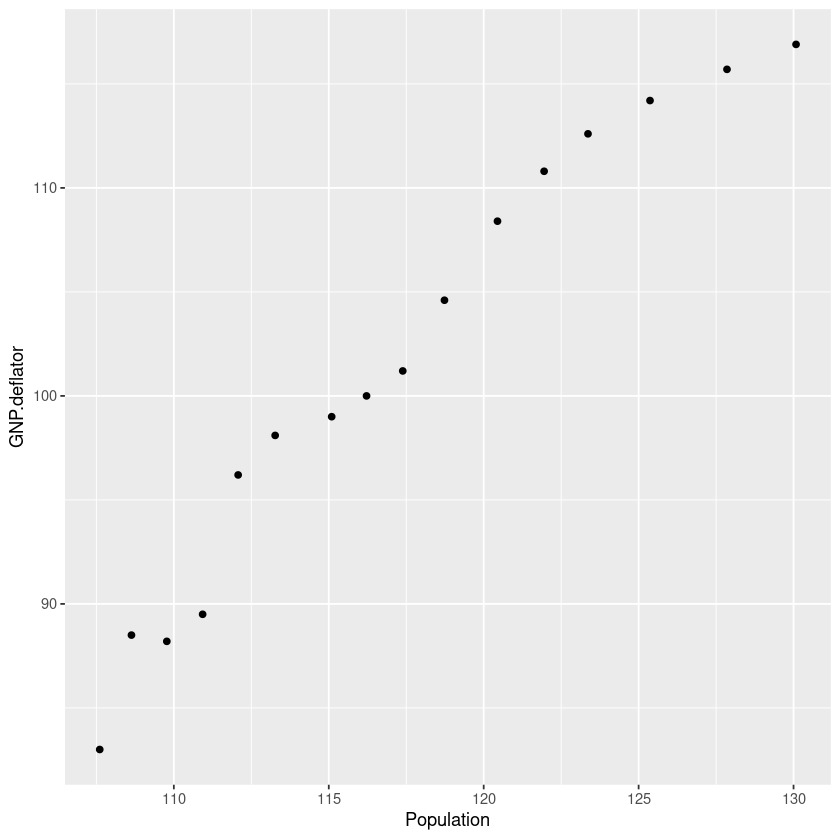

In [22]:
ggplot(longley, aes(x=employement_rate, y=GNP.deflator)) + geom_point()
ggplot(longley, aes(x=Armed.Forces, y=GNP.deflator)) + geom_point()
ggplot(longley, aes(x=Year, y=GNP.deflator)) + geom_point()
ggplot(longley, aes(x=Population, y=GNP.deflator)) + geom_point()

In [34]:
library(tidymodels)

options(scipen= 999)
longley_recipe = recipe(GNP.deflator ~ ., data=longley)

lm_model1 = linear_reg() %>%
            set_engine("lm")

lm_wflow1 = workflow() %>%
            add_model(lm_model1) %>%
            add_recipe(longley_recipe)

lm_fit1 = fit(lm_wflow1, longley)
tidy(lm_fit1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3509.537126292,3979.4960439,-0.8819049,0.3985306
GNP,0.082553854,0.1075031,0.7679208,0.4602830
Armed.Forces,0.001066124,0.0105472,0.1010812,0.9214840
Population,-0.951633571,0.6618377,-1.4378655,0.1810201
Year,1.888675399,2.0462537,0.9229918,0.3777438
employement_rate,-4.114415307,35.1130079,-0.1171764,0.9090403


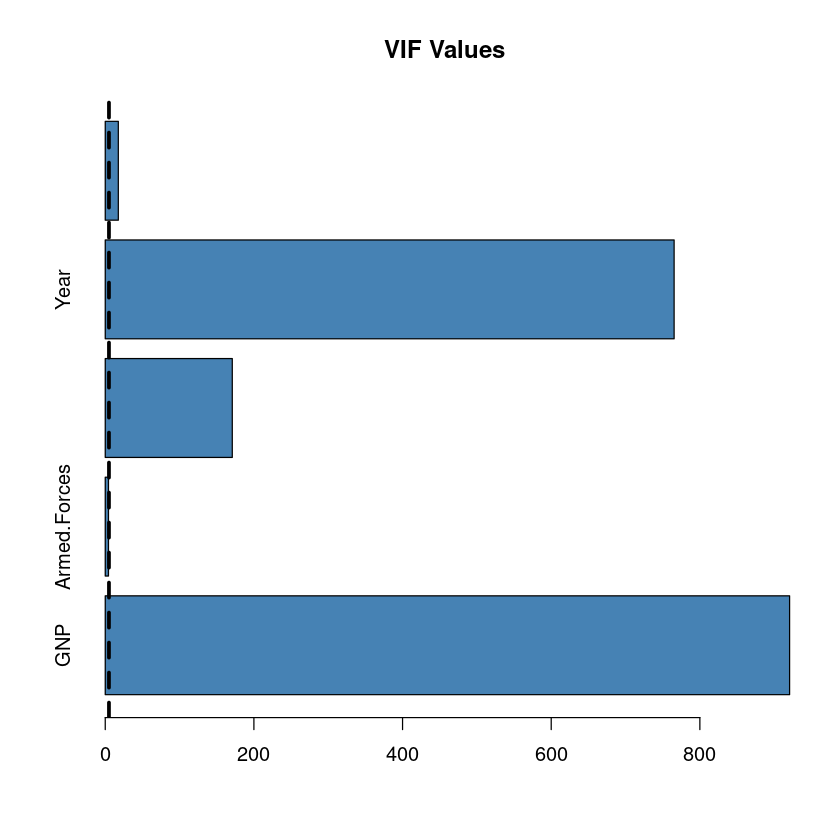

In [33]:
library(car)
lm_model = lm(GNP.deflator ~.,data = longley)
vif_values <- vif(lm_model)
#create horizontal bar chart to display each VIF value
barplot(vif_values, main = "VIF Values", horiz = TRUE, col = "steelblue")

#add vertical line at 5
abline(v = 5, lwd = 3, lty = 2)